In [61]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [62]:
data = pd.read_csv("target.csv")

In [63]:
data[:2]

,customer_id,card_tenure,risk_score,num_promoted,avg_bal,geo_group,res_type,Unnamed: 7
0,SB0000057824,198.0,755,0,3818.0,E,NaN,NaN
1,SB0000030501,206.0,647,0,3357.0,SE,CN,NaN


In [64]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [65]:
data = data.dropna(how='any')

In [66]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int) 

In [67]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [68]:
data[:2]

,card_tenure,risk_score,num_promoted,avg_bal,res_type,geo_group_E,geo_group_N,geo_group_SE,geo_group_W
1,206.0,647,0,3357.0,0,0.0,0.0,1.0,0.0
2,107.0,629,0,3728.0,0,0.0,1.0,0.0,0.0


In [69]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [70]:
Y = data['res_type'].values.astype('int64')

In [71]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [72]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [73]:
train_Features.shape

(78804, 8)

In [74]:
train_Label.shape

(78804, 5)

In [75]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [76]:
model = Sequential()

In [77]:
model.add(Dense(units=16*5,   input_dim=8,
                kernel_initializer='uniform', 
                activation='relu'))

In [78]:
model.add(Dense(units=16*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [79]:
model.add(Dense(units=16*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [80]:
model.add(Dense(units=16*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [81]:
model.add(Dense(units=16, 
                kernel_initializer='uniform', 
                activation='relu'))

In [82]:
model.add(Dense(units=5, 
                kernel_initializer='uniform',
                activation='softmax'))

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 80)                720       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                5184      
_________________________________________________________________
dense_15 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 85        
Total params: 11,205
Trainable params: 11,205
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [85]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=800,verbose=1,callbacks=[early_stopping])

Train on 70923 samples, validate on 7881 samples
Epoch 1/30
70923/70923 [==============================] - 2s 35us/step - loss: 1.4622 - acc: 0.3632 - val_loss: 1.1293 - val_acc: 0.2776
Epoch 2/30
70923/70923 [==============================] - 2s 31us/step - loss: 1.0137 - acc: 0.5311 - val_loss: 0.9171 - val_acc: 0.6352
Epoch 3/30
70923/70923 [==============================] - 1s 13us/step - loss: 0.7308 - acc: 0.6763 - val_loss: 0.4040 - val_acc: 0.8499
Epoch 4/30
70923/70923 [==============================] - 1s 17us/step - loss: 0.1548 - acc: 0.9482 - val_loss: 0.0666 - val_acc: 0.9778
Epoch 5/30
70923/70923 [==============================] - 2s 27us/step - loss: 0.0540 - acc: 0.9832 - val_loss: 0.0465 - val_acc: 0.9865
Epoch 6/30
70923/70923 [==============================] - 2s 23us/step - loss: 0.0485 - acc: 0.9812 - val_loss: 0.0503 - val_acc: 0.9765
Epoch 7/30
70923/70923 [==============================] - 2s 22us/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.0339 - val_acc:

In [86]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

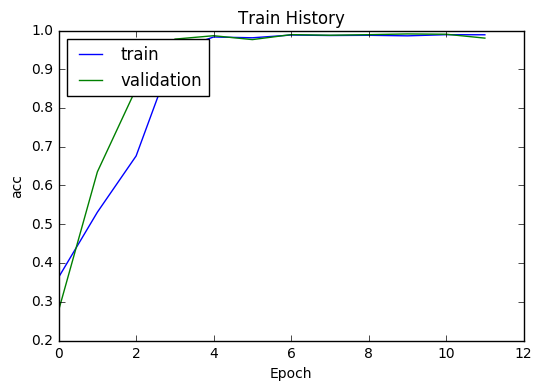

In [87]:
show_train_history(train_history,'acc','val_acc')

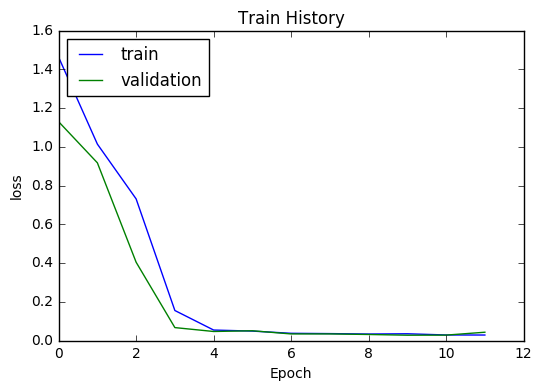

In [88]:
show_train_history(train_history,'loss','val_loss')

In [89]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 1s 41us/step


In [90]:
scores[1]

0.9818292559433583